In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import os

def roc(test, pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
 
    print ('ROC_AUC: %.6f' %roc_auc[1])
    plt.figure()
    
    plt.plot(fpr[1], tpr[1], lw=2, label='ROC curve (area = %0.4f)' % roc_auc[1])
 
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.show()

    
def roc_print(test, pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
 
    return roc_auc[1]    


def pr(test, pred):
	lw =2
	from sklearn.metrics import precision_recall_curve
	from sklearn.metrics import average_precision_score
	# Compute Precision-Recall and plot curve
	precision = dict()
	recall = dict()
	average_precision = dict()
	for i in range(2):
	    precision[i], recall[i], _ = precision_recall_curve(test,
	                                                        pred)
	    average_precision[i] = average_precision_score(test, pred)

	# Compute micro-average ROC curve and ROC area
	precision["micro"], recall["micro"], _ = precision_recall_curve(test.ravel(),
	    pred.ravel())
	average_precision["micro"] = average_precision_score(test, pred,
	                                                     average="micro")


	# Plot Precision-Recall curve
	plt.clf()
	plt.plot(recall[0], precision[0], lw=lw, color='navy',
	         label='Precision-Recall curve')
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.ylim([0.0, 1.0])
	plt.xlim([0.0, 1.0])
	plt.title('Precision-Recall: AUC={0:0.3f}'.format(average_precision[0]))
	plt.legend(loc="lower left")
	plt.show()


Using TensorFlow backend.


['acc', 'loss', 'val_acc', 'val_loss']


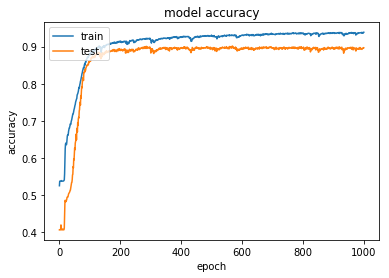

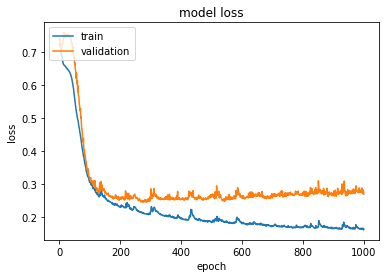

In [1]:
# Visualize training history
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 8
numpy.random.seed(seed)

dataset = numpy.loadtxt("k_tissue1_train.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,1:81]
Y = dataset[:,0]



X_val = dataset[:8000, 1:81]
Y_val = dataset[:8000 , 0]

# create model
model = Sequential()

# model.add(input_shape=(80,))
model.add(Dense(80, input_dim=80,  kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(160, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(80, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
filepath="t1.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=.25, epochs=1000, batch_size=40000, callbacks = callbacks_list, verbose=0, initial_epoch=0)
# list all data in history
print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Tissue no norm (without brca)

Created model and loaded weights from file
8128/8800 [==========================>...] - ETA: 0s 

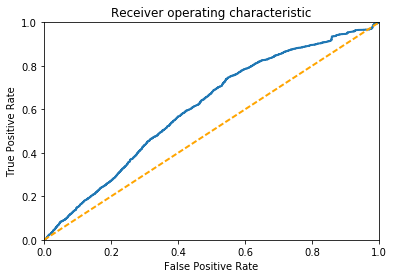

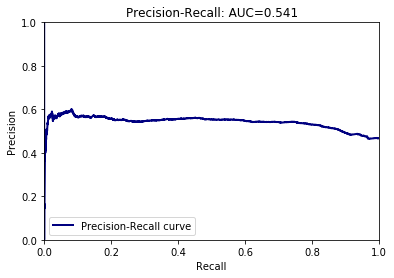

In [4]:
##Test


dataset_test = numpy.loadtxt("k_tissue1_test.csv", delimiter=",")

# split into input (X) and output (Y) variables
X_test = dataset_test[:,1:81]
Y_test = dataset_test[:,0]


# load weights
model.load_weights("t1.weights.best.hdf5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Created model and loaded weights from file")


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X_test, Y_test, verbose=1)

y_score = model.predict_proba(X_test)

print(model.metrics_names)
print(scores)

roc(Y_test, y_score)
pr(Y_test, y_score)
